In [1]:
import pandas as pd
import prepare_dataset

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)


2025-04-25 16:48:07,300 - INFO - StockPortfolioLogger - Configuration loaded successfully.
2025-04-25 16:48:07,772 - INFO - StockPortfolioLogger - Starting data injection process...
2025-04-25 16:48:07,777 - INFO - StockPortfolioLogger - Fetching news for AAPL
2025-04-25 16:48:07,791 - DEBUG - urllib3.connectionpool - Starting new HTTPS connection (1): finnhub.io:443
2025-04-25 16:48:08,149 - DEBUG - urllib3.connectionpool - https://finnhub.io:443 "GET /api/v1/company-news?symbol=AAPL&from=2020-01-03&to=2025-03-21&token=d04gfqpr01qspgm2scagd04gfqpr01qspgm2scb0 HTTP/1.1" 200 None
2025-04-25 16:48:08,272 - INFO - StockPortfolioLogger - AAPL → 238 articles fetched
2025-04-25 16:48:08,277 - INFO - StockPortfolioLogger - Fetching news for ADAP
2025-04-25 16:48:08,284 - DEBUG - urllib3.connectionpool - Starting new HTTPS connection (1): finnhub.io:443
2025-04-25 16:48:08,663 - DEBUG - urllib3.connectionpool - https://finnhub.io:443 "GET /api/v1/company-news?symbol=ADAP&from=2020-01-03&to=202

     ticker                                           headline  \
0      AAPL  Apple's AI shakeup: They might not be 'moving ...   
1      AAPL  Apple (AAPL) Eyes AI-Powered Future Despite De...   
2      AAPL  Apple, in effort to turn around Siri, shakes u...   
3      AAPL  Accenture reports Q2 beat, Apple TV+ losing $1...   
4      AAPL  Report: Apple Reassigns Siri Development to Vi...   
...     ...                                                ...   
5706   TMUS  T-Mobile Introduces Enticing 5G Internet Plans...   
5707   TMUS  Verizon Stock Hasn’t Done Great This Year. 2 R...   
5708   TMUS  T-Mobile Unveils New Home and Small Business I...   
5709   TMUS  After Hitting an  All-Time High, Is T-Mobile U...   
5710   TMUS  The Trump M&A Boom Is Coming. A Top Dealmaker ...   

                                                summary            datetime  \
0     Apple (AAPL) is shaking up its AI executives, ... 2025-03-21 23:45:00   
1     We recently published a list of 10 AI Stock

2025-04-25 16:48:18,659 - INFO - StockPortfolioLogger - Dow Jones data loaded successfully.
2025-04-25 16:48:18,693 - INFO - StockPortfolioLogger - NASDAQ data loaded successfully.
2025-04-25 16:48:18,722 - INFO - StockPortfolioLogger - S&P 500 data loaded successfully.
2025-04-25 16:48:18,733 - INFO - StockPortfolioLogger - Portfolio data loaded successfully.
2025-04-25 16:48:19,000 - INFO - StockPortfolioLogger - Portfolio prices data loaded successfully.
2025-04-25 16:48:19,003 - DEBUG - StockPortfolioLogger - Dow Jones 
         Date Ticker          Open          High           Low         Close  \
0  2020-01-02    DJI  28638.970703  28872.800781  28627.769531  28868.800781   
1  2020-01-03    DJI  28553.330078  28716.310547  28500.359375  28634.880859   
2  2020-01-06    DJI  28465.500000  28708.019531  28418.630859  28703.380859   
3  2020-01-07    DJI  28639.179688  28685.500000  28565.279297  28583.679688   
4  2020-01-08    DJI  28556.140625  28866.179688  28522.509766  28745.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    5711 non-null   object
 1   headline  5711 non-null   object
 2   summary   5630 non-null   object
 3   datetime  5711 non-null   object
 4   url       5711 non-null   object
 5   source    5711 non-null   object
dtypes: object(6)
memory usage: 267.8+ KB
None
  ticker                                           headline  \
0   AAPL  Apple's AI shakeup: They might not be 'moving ...   
1   AAPL  Apple (AAPL) Eyes AI-Powered Future Despite De...   
2   AAPL  Apple, in effort to turn around Siri, shakes u...   
3   AAPL  Accenture reports Q2 beat, Apple TV+ losing $1...   
4   AAPL  Report: Apple Reassigns Siri Development to Vi...   

                                             summary             datetime  \
0  Apple (AAPL) is shaking up its AI executives, ...  2025-03-21 23:45:00   
1  We rece

In [2]:
df= prepare_dataset.merge_df

Visulization

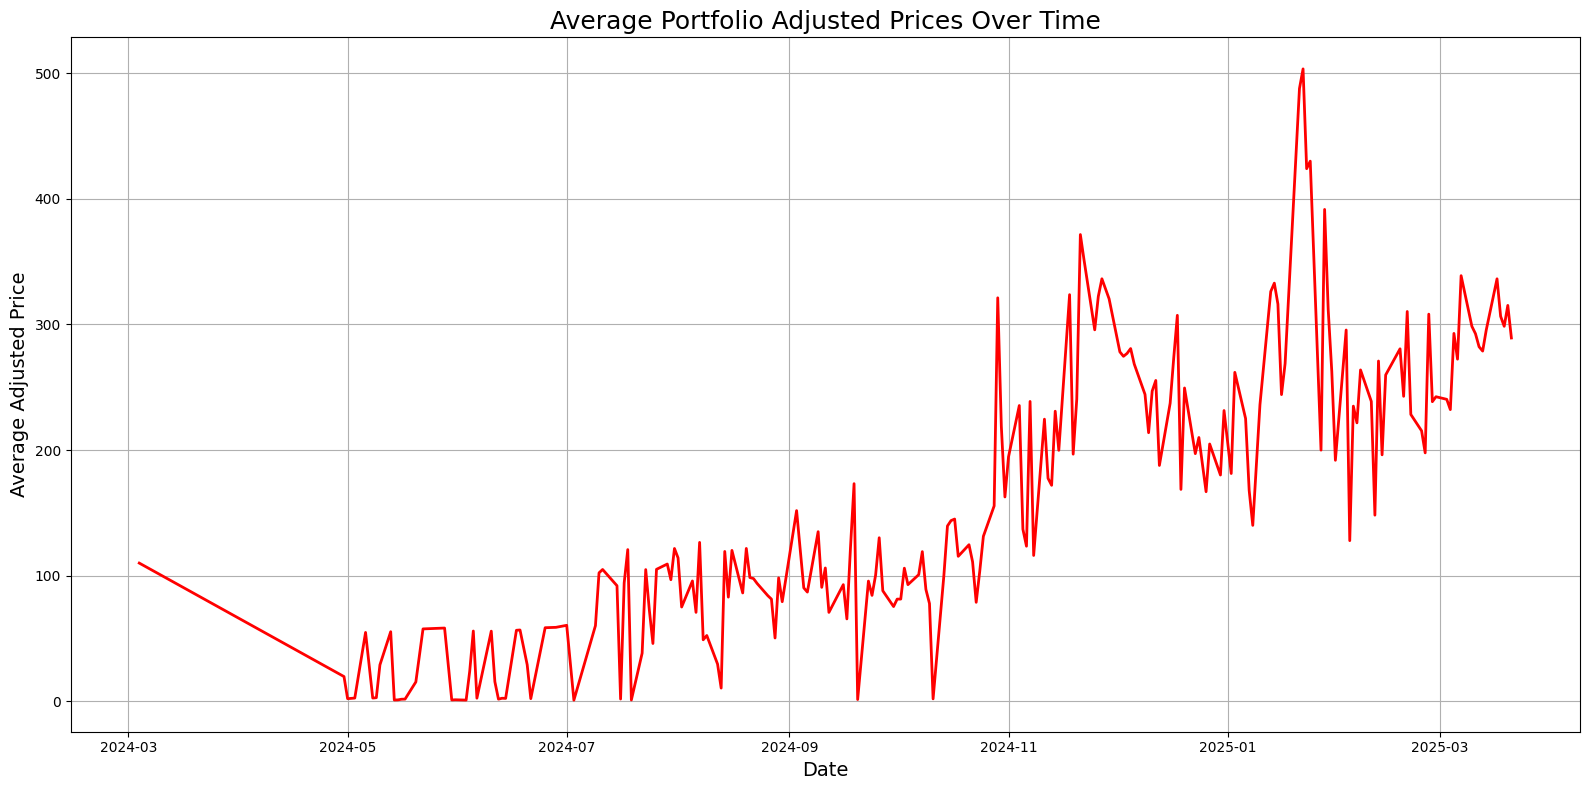

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime
df["date"] = pd.to_datetime(df["date"])

# Group by date and compute average adjusted price
avg_prices = df.groupby("date")["adjusted"].mean().reset_index()

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(avg_prices["date"], avg_prices["adjusted"], color='red', linewidth=2)

# Customize the plot
plt.title("Average Portfolio Adjusted Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Adjusted Price", fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


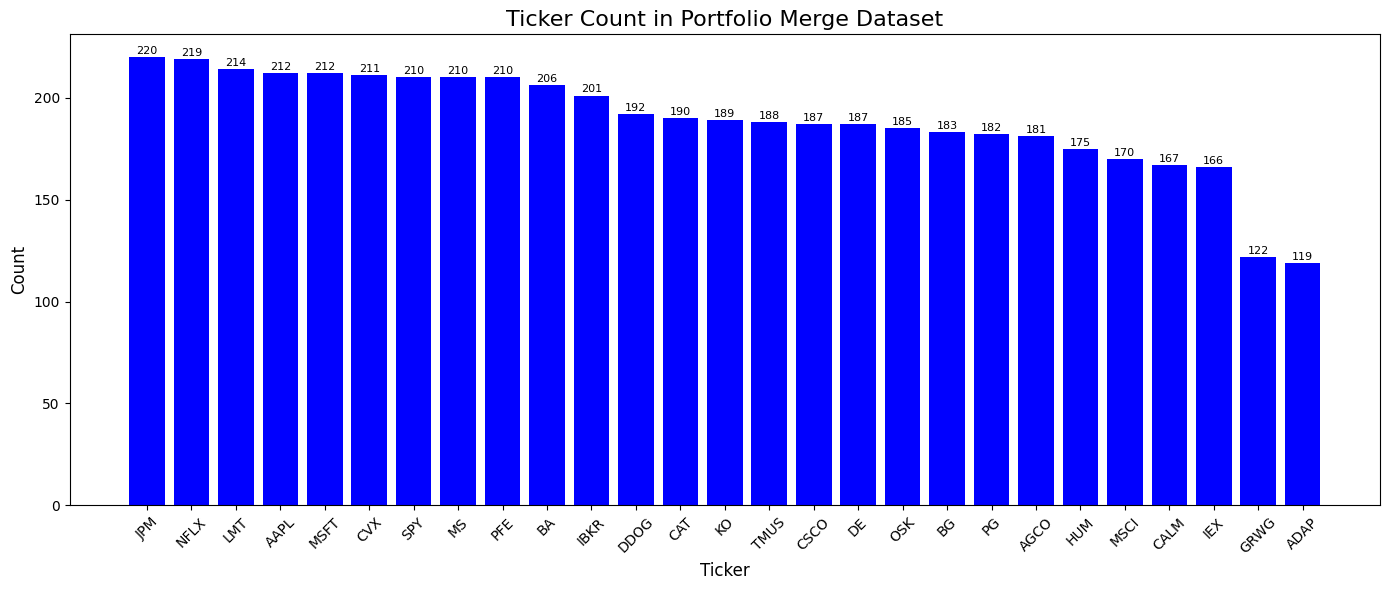

In [4]:
import matplotlib.pyplot as plt

# Count the frequency of each ticker
ticker_count = df['ticker'].value_counts().reset_index()
ticker_count.columns = ['ticker', 'count']

# Create the bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(ticker_count['ticker'], ticker_count['count'], color='blue')

# Add titles and labels
plt.title("Ticker Count in Portfolio Merge Dataset", fontsize=16)
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add integer count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


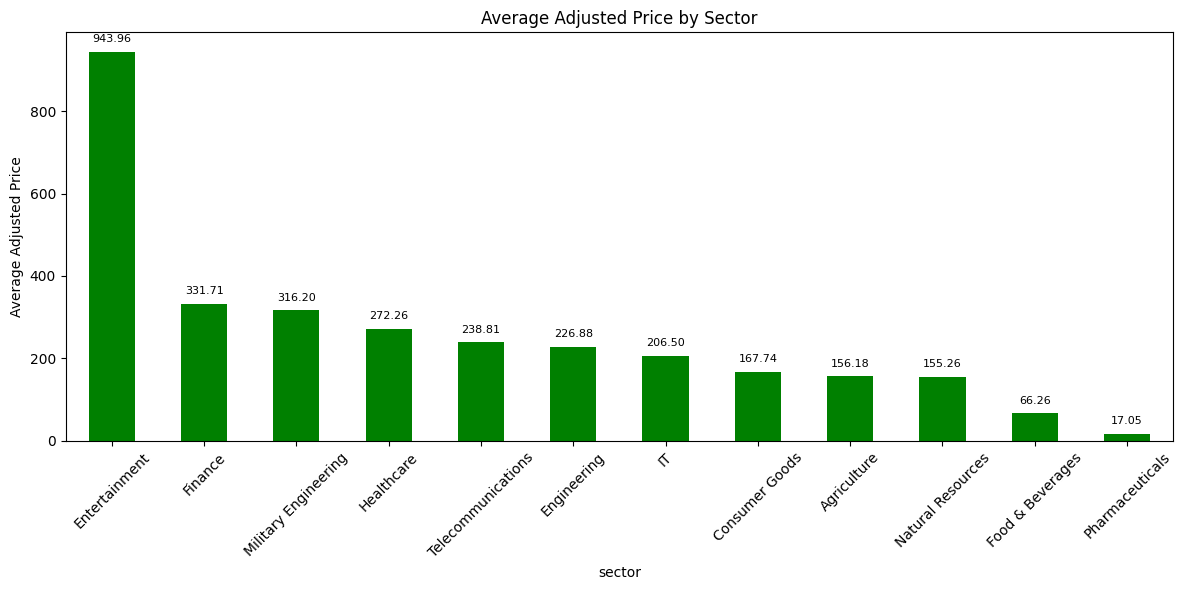

In [5]:
avg_sec_price =df.groupby('sector')['adjusted'].mean().sort_values(ascending=False)
avg_sec_price.plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Average Adjusted Price by Sector")
plt.ylabel("Average Adjusted Price")

# Add count labels on top of bars with 2 decimal places
for i, count in enumerate(avg_sec_price):
    plt.text(i, count + 0.02 * max(avg_sec_price), f"{count:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


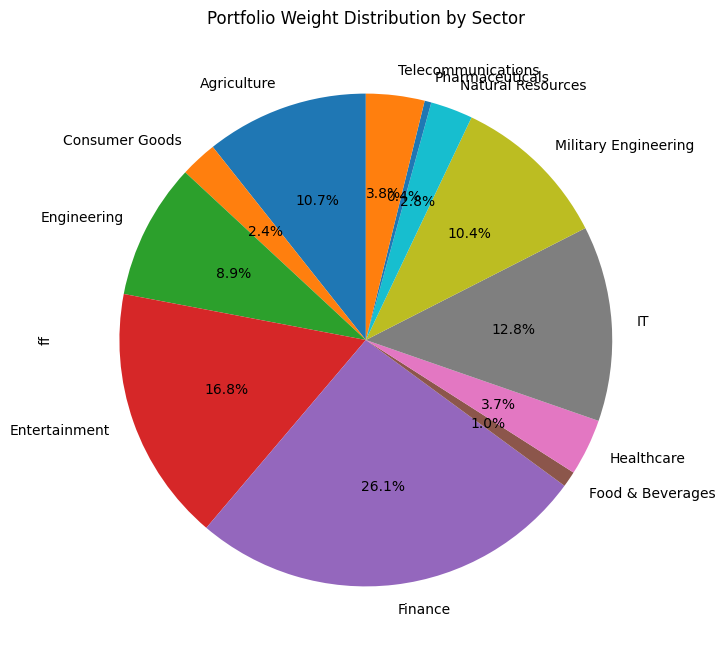

In [6]:

df.groupby("sector")["weight"].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title("Portfolio Weight Distribution by Sector")
plt.ylabel("ff")  
plt.show()


In [7]:
from wordcloud import WordCloud 
def plot_ticker_and_news_visualization(df):
    df['ticker']= df['ticker'].astype(str)
    df['headline']= df['headline'].astype(str)
    df['summary'] =df['summary'].astype(str)

    # Word Cloud of Ticker Mentions
    ticker_text = ' '.join(df['ticker'])
    ticker_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(ticker_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(ticker_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Ticker Mentions in Headline")
    plt.show()


    # Word Cloud of All Tweets
    all_headline_text = ' '.join(df['headline'])
    headline_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_headline_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(headline_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Headline")
    plt.show()

    # Word Cloud of All Tweets
    all_summary_text = ' '.join(df['headline'])
    summary_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_summary_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(summary_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Summary")
    plt.show()
    #Bar Plot: Total Word Count of Headline Per Ticker
    df['word_count'] = df['headline'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of Headline per Ticker')
    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

     #Bar Plot: Total Word Count of Summary Per Ticker
    df['word_count'] = df['summary'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of summary per Ticker')

    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

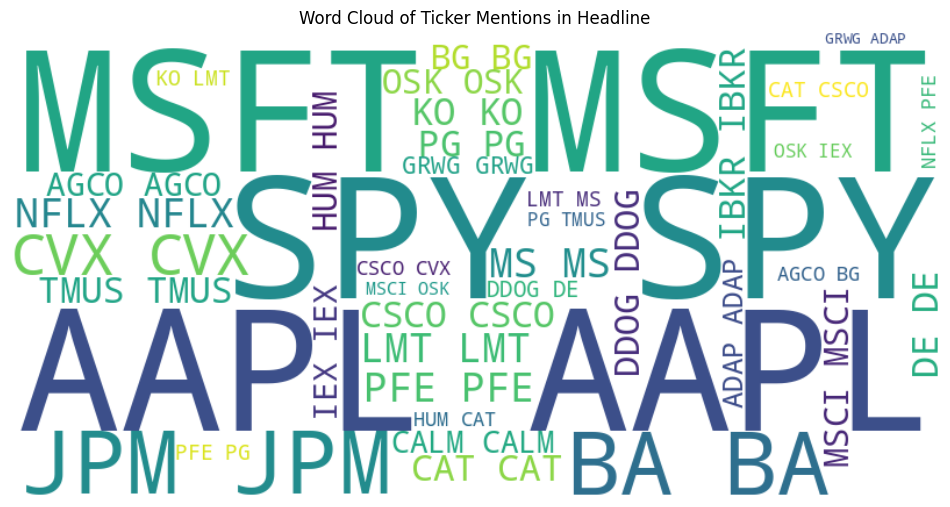

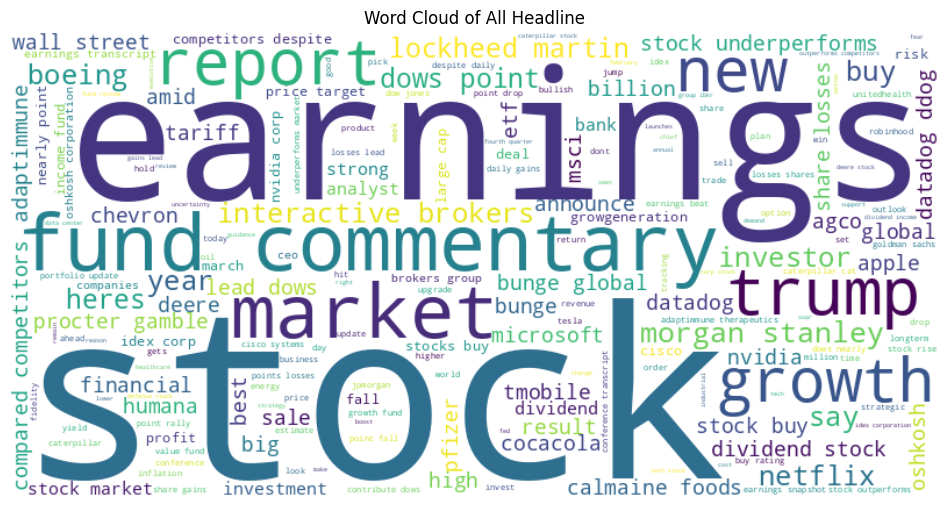

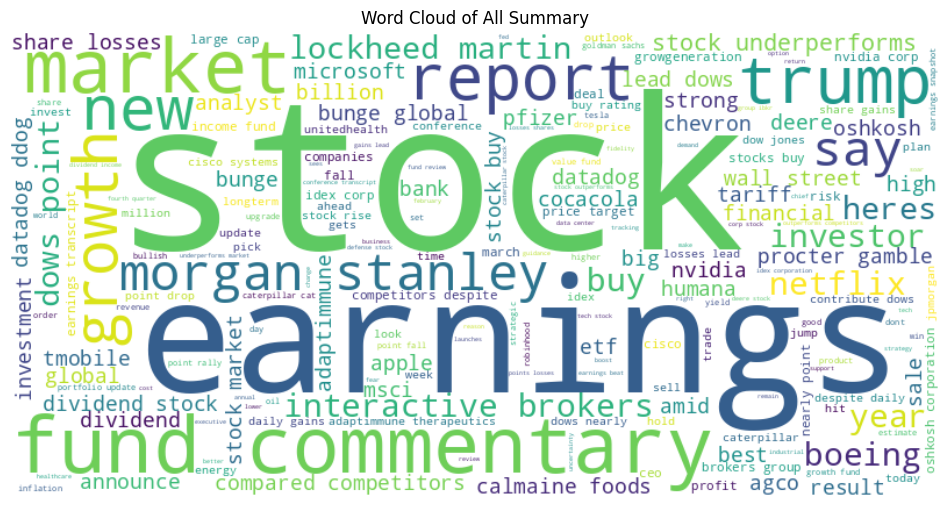

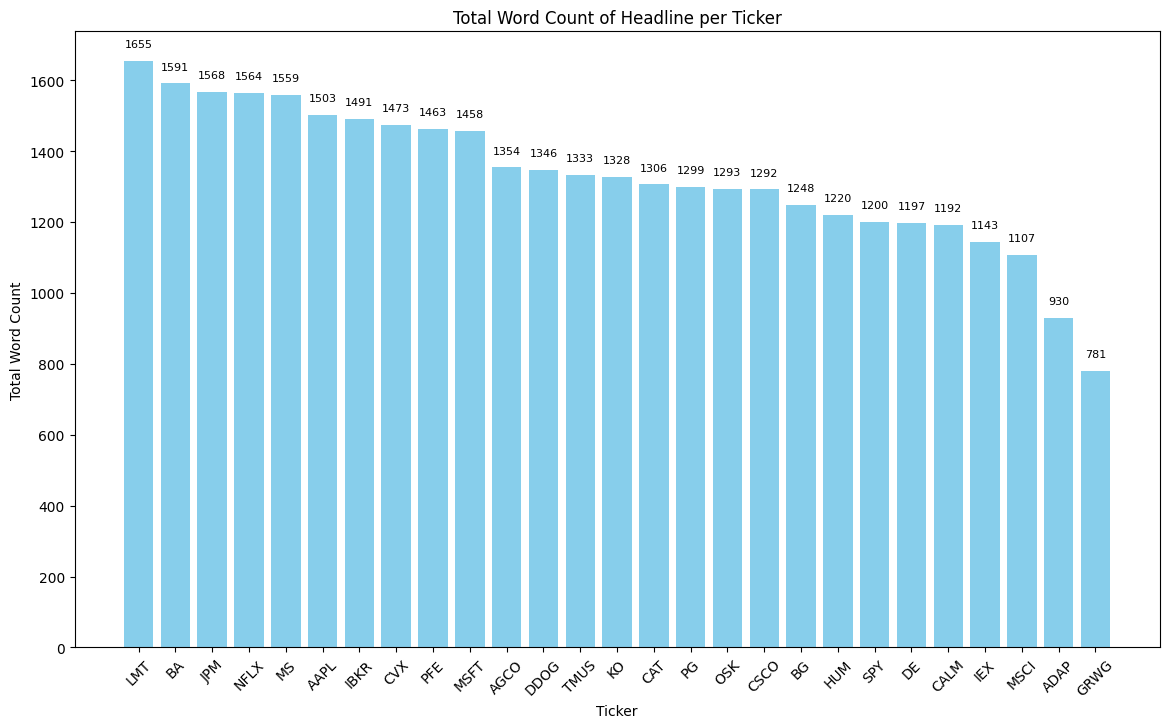

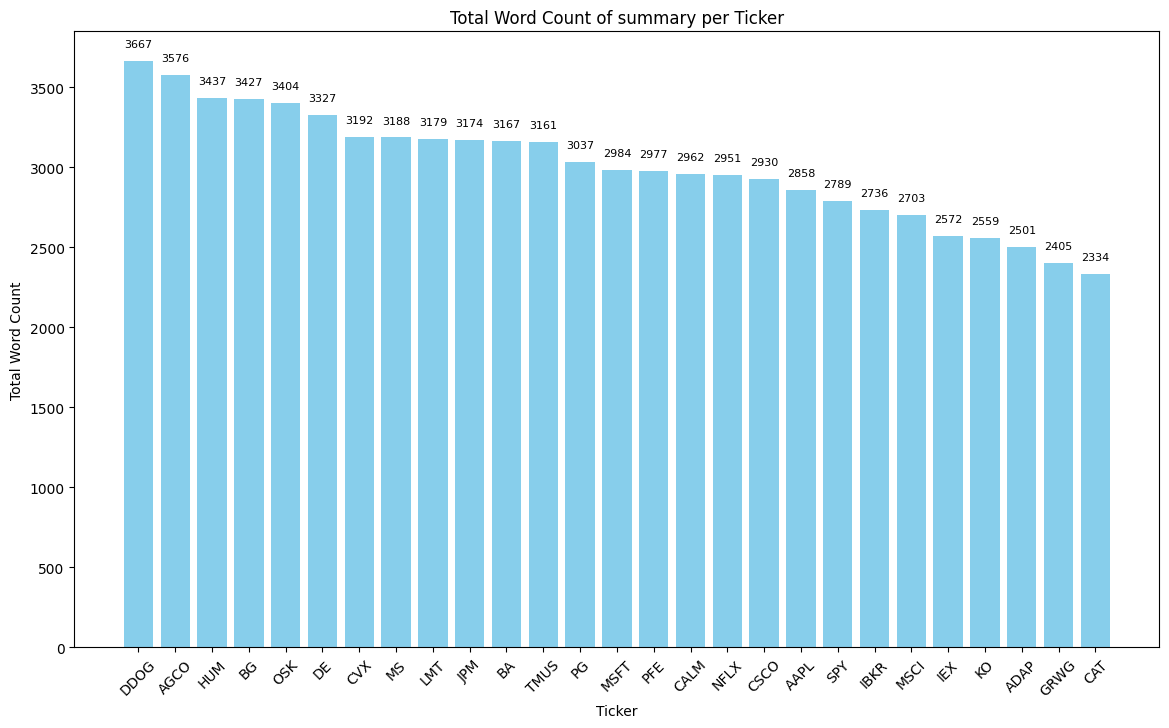

In [8]:
plot_ticker_and_news_visualization(df)

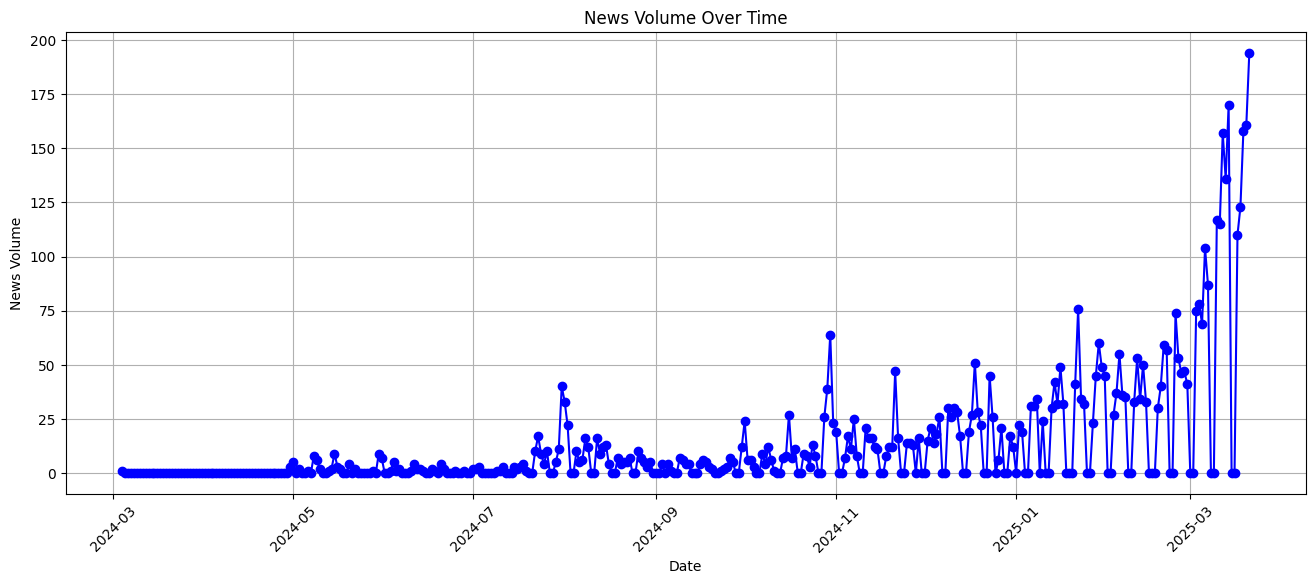

In [9]:
# Resample tweets by day to analyze volume over time
# Convert 'Date' column to DatetimeIndex and set it as index
df['date'] = pd.to_datetime(df['date'])  # Convert 'Date' to datetime objects
df.set_index('date', inplace=True)            # Set 'Date' column as the index

# Now you can apply resample
tweet_volume = df.resample("d").size()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(tweet_volume.index, tweet_volume.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("News Volume")
plt.title("News Volume Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
